## User Type 1

"As a simple user, I want to use metaheuristics, to solve a problem."

In [1]:
import cify as ci
from cify.si.pso.algorithm import InertiaWeightPSO

# 1. Set seed
ci.set_seed(0)

# 2. Create objective function
obj_func = ci.get_objective_function('rastrigin')

# 3. Create metaheuristic
pso = InertiaWeightPSO(obj_func)

# Perform 100 iterations and examine the final one.
pso.execute(100)
pso.statistics.tail(1)

CIFY: internal seed successfully set to: '0'


100%|██████████| 100/100 [00:15<00:00,  6.40it/s]


,best,worst,mean,stdev,global_optimum,n_evaluations
iteration,,,,,,
100,35.518614,274.448819,178.569922,39.400502,35.518614,5456


In [2]:
import cify as ci
from cify.si.pso.algorithm import InertiaWeightPSO

# 1. Set seed
ci.set_seed(0)

# 2. Create objective function
obj_func = ci.ObjectiveFunction(function=lambda vector: abs(sum(vector)),
                                optimization=ci.Optimization.Min)

# 3. Create metaheuristic
pso = InertiaWeightPSO(obj_func)

# Perform 100 iterations and examine the final one.
pso.execute(100)
pso.statistics.tail(1)

CIFY: internal seed successfully set to: '0'


100%|██████████| 100/100 [00:13<00:00,  7.49it/s]


,best,worst,mean,stdev,global_optimum,n_evaluations
iteration,,,,,,
100,93.285239,3199.455713,1251.804727,792.303659,0.321979,5451


## User Type 2

"As a curious user, I want to use tuned algorithms, to solve my problems."

In [3]:
import cify as ci
from cify.si.pso.algorithm import PSO

# 1. Set seed
ci.set_seed(0)

# 2. Create objective function
obj_func = ci.get_objective_function('schwefel',
                                     n_dimensions=5,
                                     optimization=ci.Optimization.Max)

# 3. Create metaheuristic
modified_swarm = ci.get_swarm(50, obj_func=obj_func)
modified_swarm.velocity_params = {'c1' : 0.4, 'c2': 0.25}

pso = PSO(obj_func,
          swarms=[ci.get_swarm(35, obj_func=obj_func),
                  ci.get_swarm(50, obj_func=obj_func),
                  modified_swarm
                  ],
          velocity_update=ci.velocity_updates.constriction_coefficient_vel_update,
          velocity_params={'k': 0.9}
          )

# Perform 100 iterations and examine the final one.
pso.execute(100)
pso.statistics.tail(1)

CIFY: internal seed successfully set to: '0'


100%|██████████| 100/100 [00:26<00:00,  3.77it/s]


,best,worst,mean,stdev,global_optimum,n_evaluations
iteration,,,,,,
100,3012.502398,886.237955,2067.166218,456.731248,3784.508297,13668


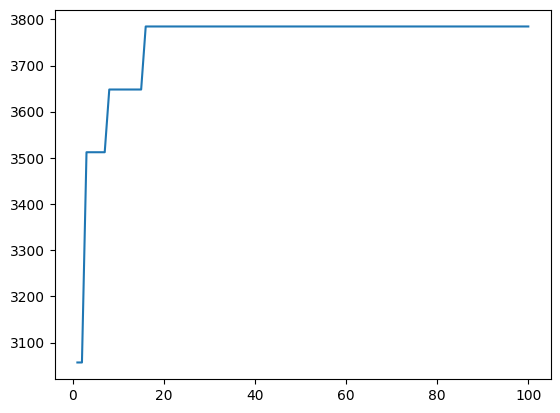

In [6]:
import matplotlib.pyplot as plt

plt.plot(pso.statistics['global_optimum'])
plt.show()

## User Type 3

"As a researcher, I want to experiment with novel metaheuristics, so that I can evaluate new approaches to optimization."

In [7]:
import cify as ci
from cify.si.pso.algorithm import PSO

# 1. Set seed
ci.set_seed(1234)

# 2. Create objective function
def sphere(vector):
    return sum([float(x)**2 for x in vector])

obj_func = ci.ObjectiveFunction(sphere,
                                ci.Optimization.Max,
                                n_dimensions=25,
                                bounds=[-10, 10]
                                )

# 3. Create metaheuristic
class CustomPSO(PSO):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def do_iteration(self):
        for swarm in self.swarms:
            for particle in swarm:
                particle.position = (particle.position + particle.p_best_position) / 2
        return super().do_iteration()

swarm = ci.get_swarm(50, obj_func=obj_func)
swarm.velocity_update = ci.velocity_updates.deterministic_iw_vel_update

pso = CustomPSO(obj_func=obj_func,
                swarms=[swarm,
                        ci.get_swarm(35, obj_func=obj_func),
                        ci.get_swarm(50, obj_func=obj_func)
                        ],
                velocity_update=ci.velocity_updates.constriction_coefficient_vel_update,
                velocity_params={'k': 0.9, 'c1': 1.345}
                )

# Perform 100 iterations and examine the final one.
pso.execute(100)
pso.statistics.tail(1)

CIFY: internal seed successfully set to: '1234'


100%|██████████| 100/100 [01:03<00:00,  1.58it/s]


,best,worst,mean,stdev,global_optimum,n_evaluations
iteration,,,,,,
100,1164.029955,483.097184,843.876113,141.116417,1503.137238,14073
